In [3]:
# 生成一个Series
import pandas as pd
ser_obj = pd.Series(range(10, 20))
print(ser_obj)
print('-'*50)
# 获取数据
print(ser_obj.values)
print(type(ser_obj.values))
# 获取索引
print(ser_obj.index)
ser_obj.dtype

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64
--------------------------------------------------
[10 11 12 13 14 15 16 17 18 19]
<class 'numpy.ndarray'>
RangeIndex(start=0, stop=10, step=1)


dtype('int64')

In [5]:
print(ser_obj[0])
ser_obj[9]
# 访问不存在的索引下标会报keyerror

10


KeyError: 10

In [6]:
print(ser_obj * 2)
print(ser_obj > 15)

0    20
1    22
2    24
3    26
4    28
5    30
6    32
7    34
8    36
9    38
dtype: int64
0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
9     True
dtype: bool


In [10]:
#字典变为series
year_data = {2001: 17.8, 2005: 20.1, 2003: 16.5}
ser_obj2 = pd.Series(year_data)
print(ser_obj2)
print(ser_obj2.index)
print(ser_obj2[2001])
ser_obj2.values

2001    17.8
2005    20.1
2003    16.5
dtype: float64
Int64Index([2001, 2005, 2003], dtype='int64')
17.8


array([17.8, 20.1, 16.5])

In [11]:
print(ser_obj2.name)
ser_obj2.name = 'temp'
print(ser_obj2.index.name)  #索引名字
ser_obj2.index.name = 'year1'
print('-'*50)
print(ser_obj2.head())


None
None
--------------------------------------------------
year1
2001    17.8
2005    20.1
2003    16.5
Name: temp, dtype: float64


# DataFrame

In [12]:
# 字典变df
d2 =[{"name" : "xiaohong" ,"age" :32,"tel" :10010},
     { "name": "xiaogang" ,"tel": 10000} ,
     {"name":"xiaowang" ,"age":22}]
df6=pd.DataFrame(d2)
df6

,name,age,tel
0,xiaohong,32.0,10010.0
1,xiaogang,NaN,10000.0
2,xiaowang,22.0,NaN


In [15]:
#df中不同列可以是不同的数据类型
import pandas as pd
import numpy as np
dict_data = {'A': 1,
             'B': pd.Timestamp('20190926'),
             'C': pd.Series(1, index=list(range(4)),dtype='float32'),
             'D': np.array([3] * 4,dtype='int32'),
             'E': ["Python","Java","C++","C"],
             'F': 'wangdao' }
df_obj2 = pd.DataFrame(dict_data)
print(df_obj2)
print(df_obj2.index)
#补课改变
# df_obj2.index[0] = 2
df_obj2.columns

   A          B    C  D       E        F
0  1 2019-09-26  1.0  3  Python  wangdao
1  1 2019-09-26  1.0  3    Java  wangdao
2  1 2019-09-26  1.0  3     C++  wangdao
3  1 2019-09-26  1.0  3       C  wangdao
Int64Index([0, 1, 2, 3], dtype='int64')


Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [16]:
# 感受日期
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df


,A,B,C,D
2013-01-01,0.015183,0.765449,-0.378834,-0.148414
2013-01-02,-0.006015,1.101937,-1.435409,-0.151703
2013-01-03,-0.506499,0.617376,1.470153,-0.035601
2013-01-04,0.133579,0.259420,-0.908532,-0.196987
2013-01-05,0.040721,0.762827,0.115783,-1.817330
2013-01-06,0.379620,-0.762489,1.748816,-0.165759


In [17]:
#pd中使用索引名来取某一行，或者列
print(df_obj2['A'])
#把df的某一列取出来是series
print(type(df_obj2['A']))

0    1
1    1
2    1
3    1
Name: A, dtype: int64
<class 'pandas.core.series.Series'>


In [18]:
#增加列数据，列名是自定义的
df_obj2['G'] = df_obj2['D'] + 4
print(df_obj2.head())

   A          B    C  D       E        F  G
0  1 2019-09-26  1.0  3  Python  wangdao  7
1  1 2019-09-26  1.0  3    Java  wangdao  7
2  1 2019-09-26  1.0  3     C++  wangdao  7
3  1 2019-09-26  1.0  3       C  wangdao  7


In [19]:
# 删除列
del(df_obj2['G'])
print(df_obj2.head())

   A          B    C  D       E        F
0  1 2019-09-26  1.0  3  Python  wangdao
1  1 2019-09-26  1.0  3    Java  wangdao
2  1 2019-09-26  1.0  3     C++  wangdao
3  1 2019-09-26  1.0  3       C  wangdao


# 4 Pandas的索引操作

In [20]:
print(df_obj2.index)

Int64Index([0, 1, 2, 3], dtype='int64')


In [20]:
# 索引对象的值不可变（上面代码增加）
df_obj2.index[0] = 2

TypeError: Index does not support mutable operations

3 常见的Index种类
•Index，索引
•Int64Index，整数索引
•MultiIndex，层级索引
•DatetimeIndex，时间戳类型

In [21]:
ser_obj = pd.Series(range(5), index = list("abcde"))
print(ser_obj)
ser_obj.index

a    0
b    1
c    2
d    3
e    4
dtype: int64


Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [22]:
# 行索引，不仅可以用索引名，可以用索引顺序或来取
print(ser_obj['b'])
print(ser_obj[2])

1
2


In [24]:
# 切片索引
print(ser_obj[1:3])  #索引顺序是开区间
print(ser_obj['b':'d'])  #记住索引名是闭区间

b    1
c    2
dtype: int64
b    1
c    2
d    3
dtype: int64


In [23]:
# 不连续索引
print(ser_obj[[0, 2, 4]])
print(ser_obj[['a', 'e']])

a    0
c    2
e    4
dtype: int64
a    0
e    4
dtype: int64


In [24]:
# 布尔索引
ser_bool = ser_obj > 2
print(ser_bool)
print(ser_obj[ser_bool])

print(ser_obj[ser_obj > 2])

a    False
b    False
c    False
d     True
e     True
dtype: bool
d    3
e    4
dtype: int64
d    3
e    4
dtype: int64


4 DataFrame索引

In [25]:
import numpy as np
df_obj = pd.DataFrame(np.random.randn(5,4),
                      columns = ['a', 'b', 'c', 'd'])
print(df_obj.head())

          a         b         c         d
0 -0.064081 -0.135783 -1.118781 -2.093670
1 -1.612195  0.582381  0.053605  0.307737
2 -0.323311 -0.027146 -0.631077  0.609396
3 -0.548085  0.124220  0.427319  1.058793
4  0.467807  1.582303 -0.346254  2.643839


In [26]:
# 列索引
print(df_obj['a']) # 返回Series类型
print(df_obj[['a']]) # 返回DataFrame类型
print(type(df_obj[['a']])) # 返回DataFrame类型

0   -0.064081
1   -1.612195
2   -0.323311
3   -0.548085
4    0.467807
Name: a, dtype: float64
          a
0 -0.064081
1 -1.612195
2 -0.323311
3 -0.548085
4  0.467807
<class 'pandas.core.frame.DataFrame'>


1. loc 标签索引

In [32]:
# 标签索引 loc，建议使用loc，效率更高
# Series
print(ser_obj)
print(ser_obj['b':'d'])
print(ser_obj.loc['b':'d'])

# DataFrame
print('-'*50)
df_obj = pd.DataFrame(np.random.randn(5,4),
                      columns = list('dcba'),
                      index=list('abcde'))
print(df_obj)
print('-'*50)
print(df_obj['a'])  #建议不用
print('-'*50)
print(df_obj.loc['a'])  #拿的是行
print('-'*50)
# 第一个参数索引行，第二个参数是列,loc或者iloc效率高于直接用取下标的方式，前闭后闭
print(df_obj.loc['a':'c', 'd':'b'])
print(df_obj.loc[['a','c'], 'd':'b'])

a    0
b    1
c    2
d    3
e    4
dtype: int64
b    1
c    2
d    3
dtype: int64
b    1
c    2
d    3
dtype: int64
--------------------------------------------------
          d         c         b         a
a  0.802073  0.952951 -0.641284  1.179337
b -0.146005 -1.640905  0.040764  1.888900
c  0.768382 -0.997912  0.019324  0.267785
d -1.324320 -0.434249  0.631456  0.949521
e  0.442988 -0.420455 -0.116380 -1.146667
--------------------------------------------------
a    1.179337
b    1.888900
c    0.267785
d    0.949521
e   -1.146667
Name: a, dtype: float64
--------------------------------------------------
d    0.802073
c    0.952951
b   -0.641284
a    1.179337
Name: a, dtype: float64
--------------------------------------------------
          d         c         b
a  0.802073  0.952951 -0.641284
b -0.146005 -1.640905  0.040764
c  0.768382 -0.997912  0.019324
          d         c         b
a  0.802073  0.952951 -0.641284
c  0.768382 -0.997912  0.019324


iloc 位置索引

In [31]:
# Series
print(ser_obj[1:3])
print(ser_obj.iloc[1:3])

# DataFrame，iloc是前闭后开[)
print(df_obj.iloc[0:2, 0:2]) # 注意和df_obj.loc[0:2, 'a']的区别

b    1
c    2
dtype: int64
b    1
c    2
dtype: int64
          d         c         b        a
a  0.036559 -0.450971  1.229699  0.52032
b -0.905798  0.186328  0.941541  0.27258
          d         c
a  0.036559 -0.450971
b -0.905798  0.186328


# 5.对齐运算

In [2]:
import pandas as pd
s1 = pd.Series(range(10, 20), index = range(10))
s2 = pd.Series(range(20, 25), index = range(5))
# Series 对齐运算
print('s1+s2: ')
s3=s1+s2
print(s3)  #缺失数据默认是NaN  np.nan
print(s3[6])
print('-'*50)
print(s1.add(s2, fill_value = 0))  #未对齐的数据将和填充值做运算

s1+s2: 
0    30.0
1    32.0
2    34.0
3    36.0
4    38.0
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
dtype: float64
nan
--------------------------------------------------
0    30.0
1    32.0
2    34.0
3    36.0
4    38.0
5    15.0
6    16.0
7    17.0
8    18.0
9    19.0
dtype: float64


In [7]:
import numpy as np
df1 = pd.DataFrame(np.ones((2,2)), columns = ['a', 'b'])
df2 = pd.DataFrame(np.ones((3,3)), columns = ['a', 'b', 'c'])
print(df2.dtypes)
print(df1-df2)
print(df1.sub(df2, fill_value = 2)) #未对齐的数据将和填充值做运算

a    float64
b    float64
c    float64
dtype: object
     a    b   c
0  0.0  0.0 NaN
1  0.0  0.0 NaN
2  NaN  NaN NaN
     a    b    c
0  0.0  0.0  1.0
1  0.0  0.0  1.0
2  1.0  1.0  1.0


# 6 Pandas的函数应用

In [8]:
# Numpy ufunc 函数
df = pd.DataFrame(np.random.randn(5,4) - 1)
print(df)

print(np.abs(df))

          0         1         2         3
0 -1.236432 -0.813809 -3.211489  1.016622
1 -0.715499 -1.847777 -1.155084 -1.553599
2 -2.134775 -2.333909 -1.527941 -2.117003
3 -1.513186  0.371438  1.314558 -1.356391
4 -1.173111 -0.818137  0.038823 -0.567460
          0         1         2         3
0  1.236432  0.813809  3.211489  1.016622
1  0.715499  1.847777  1.155084  1.553599
2  2.134775  2.333909  1.527941  2.117003
3  1.513186  0.371438  1.314558  1.356391
4  1.173111  0.818137  0.038823  0.567460


In [9]:
#apply默认作用在列上
print(df.apply(lambda x : x.max()))

0   -0.715499
1    0.371438
2    1.314558
3    1.016622
dtype: float64


In [10]:
#apply作用在行上
print(df.apply(lambda x : x.max(), axis=1))

0    1.016622
1   -0.715499
2   -1.527941
3    1.314558
4    0.038823
dtype: float64


In [11]:
# 使用applymap应用到每个数据
print(df.applymap(lambda x : '%.2f' % x))
df.dtypes

       0      1      2      3
0  -1.24  -0.81  -3.21   1.02
1  -0.72  -1.85  -1.16  -1.55
2  -2.13  -2.33  -1.53  -2.12
3  -1.51   0.37   1.31  -1.36
4  -1.17  -0.82   0.04  -0.57


0    float64
1    float64
2    float64
3    float64
dtype: object

In [43]:
type('%.2f' % 1.3456)

str

4 索引排序

In [19]:
# Series
print(np.random.randint(5, size=5))
s4 = pd.Series(range(10, 15), index = np.random.randint(5, size=5))
print(s4)

# 索引排序,sort_index返回一个新的排好索引的series
s4.sort_index() # 0 0 1 3 3
print(s4)
# s4.loc[0:3]  loc索引值不唯一时直接报错
print(s4.iloc[0:3])
s4[0:3]  #默认用的位置索引

[0 4 0 3 4]
2    10
1    11
3    12
4    13
2    14
dtype: int64
2    10
1    11
3    12
4    13
2    14
dtype: int64
2    10
1    11
3    12
dtype: int64


2    10
1    11
3    12
dtype: int64

In [20]:
# DataFrame
df4 = pd.DataFrame(np.random.randn(5, 5), 
                   index=np.random.randint(5, size=5),
                   columns=np.random.randint(5, size=5))
print(df4)
#轴零是行索引排序，ascending可以指定升序排序或者降序排序
df4_isort = df4.sort_index(axis=0, ascending=False)
print(df4_isort)
#轴1是列索引排序
df4_isort = df4.sort_index(axis=1, ascending=False)
print(df4_isort) 

          0         4         3         4         3
1 -0.191713 -0.651840  0.584026 -0.351993  1.111212
3  2.720185  0.675387  0.108241  0.516203  0.979841
1 -2.636843  0.262541  0.672325 -0.571415  0.421952
3  0.039947 -0.847332  0.340198  1.536423 -0.608780
3 -0.878027 -0.290753  1.542655 -1.124647 -0.499095
          0         4         3         4         3
3  2.720185  0.675387  0.108241  0.516203  0.979841
3  0.039947 -0.847332  0.340198  1.536423 -0.608780
3 -0.878027 -0.290753  1.542655 -1.124647 -0.499095
1 -0.191713 -0.651840  0.584026 -0.351993  1.111212
1 -2.636843  0.262541  0.672325 -0.571415  0.421952
          4         4         3         3         0
1 -0.651840 -0.351993  0.584026  1.111212 -0.191713
3  0.675387  0.516203  0.108241  0.979841  2.720185
1  0.262541 -0.571415  0.672325  0.421952 -2.636843
3 -0.847332  1.536423  0.340198 -0.608780  0.039947
3 -0.290753 -1.124647  1.542655 -0.499095 -0.878027


# 5 按值排序

In [7]:
import numpy as np
list1 = [1,2,3,4,5,6]
test = np.array(list1)
print(test.reshape(2,3))
print(test)

[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]


In [21]:
# 按值排序,by后是column的值
import random
l=[random.randint(0,100) for i in range(24)]
df4 = pd.DataFrame(np.array(l).reshape(6,4))
print(df4.values)
print('-'*50)
print(df4)
print('-'*50)
#按轴零排序，by后是列名
df4_vsort = df4.sort_values(by=3,axis=0, ascending=False) #寻找的是columns里的3
print(df4_vsort)
#按轴1排序，by后行索引名`
df4_vsort = df4.sort_values(by=3,axis=1, ascending=False) #寻找的是index里的3
print(df4_vsort)

[[96 41 10 86]
 [ 4 14 54 81]
 [61 88 52 54]
 [ 7 81 12 71]
 [ 8 53 11 21]
 [69 18 29 85]]
--------------------------------------------------
    0   1   2   3
0  96  41  10  86
1   4  14  54  81
2  61  88  52  54
3   7  81  12  71
4   8  53  11  21
5  69  18  29  85
--------------------------------------------------
    0   1   2   3
0  96  41  10  86
5  69  18  29  85
1   4  14  54  81
3   7  81  12  71
2  61  88  52  54
4   8  53  11  21
    1   3   2   0
0  41  86  10  96
1  14  81  54   4
2  88  54  52  61
3  81  71  12   7
4  53  21  11   8
5  18  85  29  69


# 6 处理缺失数据

In [22]:
df_data = pd.DataFrame([np.random.randn(3), [1., 2., np.nan],
                       [np.nan, 4., np.nan], [1., 2., 3.]])
print(df_data.head())

          0         1         2
0 -0.831066 -0.518792  0.639136
1  1.000000  2.000000       NaN
2       NaN  4.000000       NaN
3  1.000000  2.000000  3.000000


In [23]:
print(df_data.isnull())

       0      1      2
0  False  False  False
1  False  False   True
2   True  False   True
3  False  False  False


In [24]:
print(df_data.dropna())

          0         1         2
0 -0.831066 -0.518792  0.639136
3  1.000000  2.000000  3.000000


In [25]:
print(df_data.dropna(axis=1))  #某列由nan就删除该列

          1
0 -0.518792
1  2.000000
2  4.000000
3  2.000000


In [26]:
#给零列的空值填为-100
print(df_data.iloc[:,0].fillna(-100.))

0     -0.831066
1      1.000000
2   -100.000000
3      1.000000
Name: 0, dtype: float64


In [58]:
for i in df_data.columns:
    print(i)

0
1
2


# 7 层级索引（hierarchical indexing）

In [2]:
import pandas as pd
import numpy as np

#MultiIndex是层级索引，索引类型的一种
index1 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd'],
                [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]], names=['cloth', 'size'])

ser_obj = pd.Series(np.random.randn(12),index=index1)
print(ser_obj)
print(type(ser_obj))
print(type(ser_obj.index))
print(ser_obj.index)
print(ser_obj.index.levels)
ser_obj.index.codes


cloth  size
a      0       0.261184
       1       0.422965
       2       0.657551
b      0       0.005127
       1       0.429716
       2      -0.137989
c      0      -0.162706
       1       0.627635
       2       0.683042
d      0      -0.334545
       1       0.611345
       2      -1.100916
dtype: float64
<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.multi.MultiIndex'>
MultiIndex([('a', 0),
            ('a', 1),
            ('a', 2),
            ('b', 0),
            ('b', 1),
            ('b', 2),
            ('c', 0),
            ('c', 1),
            ('c', 2),
            ('d', 0),
            ('d', 1),
            ('d', 2)],
           names=['cloth', 'size'])
[['a', 'b', 'c', 'd'], [0, 1, 2]]


FrozenList([[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [28]:
#层级索引如何取数据
print(ser_obj) 
print('-'*50)
print(ser_obj['c'])
print('-'*50)
print(ser_obj['a', 2])
print('-'*50)
print(ser_obj[:, 2])

cloth  size
a      0      -1.219151
       1       0.381703
       2       1.205802
b      0      -0.114953
       1      -2.371361
       2      -0.735034
c      0       1.074667
       1      -1.065020
       2      -1.284472
d      0       0.106585
       1       0.759851
       2      -1.292380
dtype: float64
--------------------------------------------------
size
0    1.074667
1   -1.065020
2   -1.284472
dtype: float64
--------------------------------------------------
1.205802183040869
--------------------------------------------------
cloth
a    1.205802
b   -0.735034
c   -1.284472
d   -1.292380
dtype: float64


In [3]:
#交换层级
print(ser_obj.swaplevel())
print('-'*50)

ser_obj=ser_obj.swaplevel()
print(ser_obj)
print(ser_obj.sort_index(level=0))  #层级索引按那个索引级别排序
#把0索引（最外层索引）变为列索引，即成了一个dataframe类型
df_obj=ser_obj.unstack(0)  #unstack可以放索引名，或者索引位置
print(df_obj)
print(type(df_obj))


size  cloth
0     a        0.261184
1     a        0.422965
2     a        0.657551
0     b        0.005127
1     b        0.429716
2     b       -0.137989
0     c       -0.162706
1     c        0.627635
2     c        0.683042
0     d       -0.334545
1     d        0.611345
2     d       -1.100916
dtype: float64
--------------------------------------------------
size  cloth
0     a        0.261184
1     a        0.422965
2     a        0.657551
0     b        0.005127
1     b        0.429716
2     b       -0.137989
0     c       -0.162706
1     c        0.627635
2     c        0.683042
0     d       -0.334545
1     d        0.611345
2     d       -1.100916
dtype: float64
size  cloth
0     a        0.261184
      b        0.005127
      c       -0.162706
      d       -0.334545
1     a        0.422965
      b        0.429716
      c        0.627635
      d        0.611345
2     a        0.657551
      b       -0.137989
      c        0.683042
      d       -1.100916
dtype: float64
size

In [33]:
#对df进行stack，就会把行，列索引进行堆叠，变为series
df_obj.stack()  #stack变为series和unstack保持一致的

cloth  size
a      0      -1.219151
       1       0.381703
       2       1.205802
b      0      -0.114953
       1      -2.371361
       2      -0.735034
c      0       1.074667
       1      -1.065020
       2      -1.284472
d      0       0.106585
       1       0.759851
       2      -1.292380
dtype: float64

# 8 Pandas统计计算和描述

In [40]:
print(df_obj)
df_obj.loc[0,'b']=np.nan
print(df_obj)
print('-'*50)
print(df_obj.min(axis=0, skipna=True))
print('-'*50)
print(df_obj.describe())  #观察数据分布的一种方法

cloth         a         b         c         d
size                                         
0     -1.219151       NaN  1.074667  0.106585
1      0.381703 -2.371361 -1.065020  0.759851
2      1.205802 -0.735034 -1.284472 -1.292380
cloth         a         b         c         d
size                                         
0     -1.219151       NaN  1.074667  0.106585
1      0.381703 -2.371361 -1.065020  0.759851
2      1.205802 -0.735034 -1.284472 -1.292380
--------------------------------------------------
cloth
a   -1.219151
b   -2.371361
c   -1.284472
d   -1.292380
dtype: float64
--------------------------------------------------
cloth         a         b         c         d
count  3.000000  2.000000  3.000000  3.000000
mean   0.122785 -1.553198 -0.424942 -0.141981
std    1.233037  1.157058  1.303326  1.048452
min   -1.219151 -2.371361 -1.284472 -1.292380
25%   -0.418724 -1.962280 -1.174746 -0.592898
50%    0.381703 -1.553198 -1.065020  0.106585
75%    0.793753 -1.144116  0.004823  0.

In [42]:
df_obj.loc[:,'c']

size
0    1.074667
1   -1.065020
2   -1.284472
Name: c, dtype: float64

In [43]:
#计算最小值或者最大值的索引的位置
print(df_obj.loc[:,'c'].argmin())#argmin和argmax只能是series，不能是df


2


In [44]:
#返回的是一个series
df_obj.idxmin(axis=1)  #计算最小值或者最大值的索引值

size
0    a
1    b
2    d
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None
              Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1000.000000  1000.000000        1000.000000  1000.00

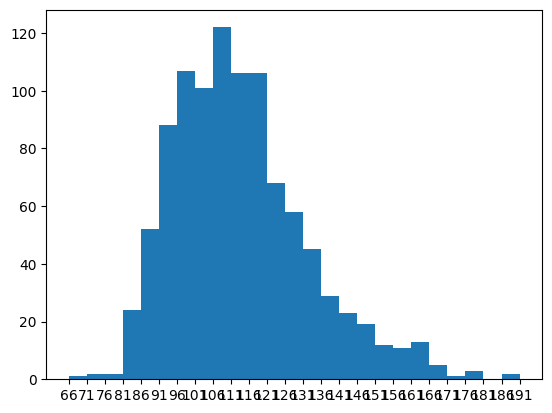

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path) #不加路径默认当前路径
# 打印数据信息
print(df.info())
print(df.describe())
# print(df.head(1))

# # 获取平均评分
# print(df["Rating"].mean())
print('-'*50)
# 导演的人数
print(len(set(df["Director"].tolist()))) # 将导演作为一个集合作去重处理
print(len(df["Director"].unique())) # df可以直接用函数作去重处理


# # 获取演员的人数
temp_actors_list = df["Actors"].str.split(", ").tolist()  #二维列表

# print(temp_actors_list)
actors_list = [i for j in temp_actors_list for i in j]  #二维展为一维
actors_num = len(set(actors_list))
print(actors_num)

# rating,runtime分布情况
# 选择图形，直方图
# 准备数据
runtime_data = df["Runtime (Minutes)"].values

# print(df["Runtime (Minutes)"])
# print(type(df["Runtime (Minutes)"]))

max_runtime = runtime_data.max()
min_runtime = runtime_data.min()

# 计算组数
print(max_runtime - min_runtime)
print('-'*50)
num_bin = (max_runtime - min_runtime) // 5

# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, int(num_bin))

plt.xticks(range(min_runtime, max_runtime + 5, 5))
plt.savefig("./11.svg")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None
   Rank                    Title                    Genre  \
0     1  Guardians of the Galaxy  Action,Adventure,Sci-Fi   

                 

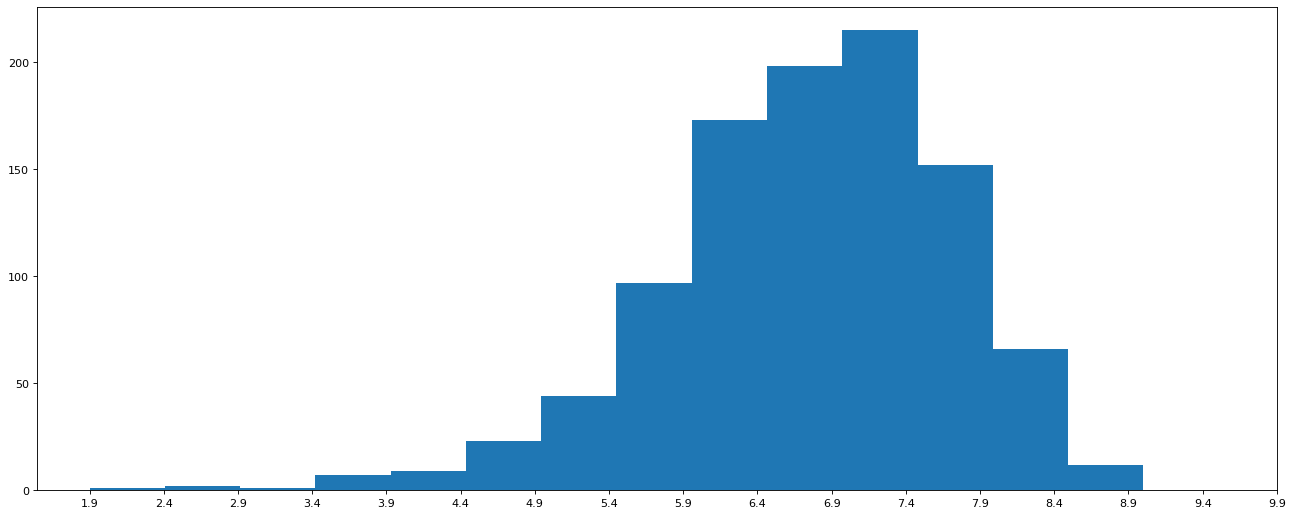

In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path)
# 打印数据信息
print(df.info())

print(df.head(1))

# 获取平均评分
print(df["Rating"].mean())

# 导演的人数
print(len(set(df["Director"].tolist())))
print(len(df["Director"].unique()))

# 获取演员的人数
temp_actors_list = df["Actors"].str.split(", ").tolist()
actors_list = [i for j in temp_actors_list for i in j]
actors_num = len(set(actors_list))
print(actors_num)

# rating,runtime分布情况
# 选择图形，直方图
# 准备数据
runtime_data = df["Rating"].values

max_runtime = runtime_data.max()
min_runtime = runtime_data.min()
print('-'*50)
print(max_runtime,min_runtime)
# 计算组数
print(max_runtime - min_runtime)
num_bin = (max_runtime - min_runtime) // 0.5

# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, int(num_bin))

#因为range的步长不支持0.5，因此需要自己设置好
_x = [min_runtime]
i = min_runtime
while i <= max_runtime + 0.5:
    i = i + 0.5
    _x.append(i)

plt.xticks(_x)

plt.show()

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
Name: Genre, dtype: object
20
     Sci-Fi  Music  Comedy  Sport  Mystery  Action  Horror  Adventure  \
0       0.0    0.0     0.0    0.0      0.0     0.0     0.0        0.0   
1       0.0    0.0     0.0    0.0      0.0     0.0     0.0        0.0   
2       0.0    0.0     0.0    0.0      0.0     0.0     0.0        0.0   
3       0.0    0.0     0.0    0.0      0.0     0.0     0.0        0.0   
4       0.0    0.0     0.0    0.0      0.0     0.0     0.0        0.0   
..      ...    ...     ...    ...      ...     ...     ...        ...   
995     0.0    0.0     0.0    0.0      0.0     0.0     0.0        0.0   
996     0.0    0.0     0.0    0.0      0.0     0.0     0.0        0.0   
997     0.0    0.0     0.0    0.0      0.0     0.0     0.0        0.0   
998     0.0    0.0     0.0    0.0      0.0     0.0     0.0        0.0   
999     0.0    0.0     0.0    0.0      0.0     0.0     0.0        0.0   

   

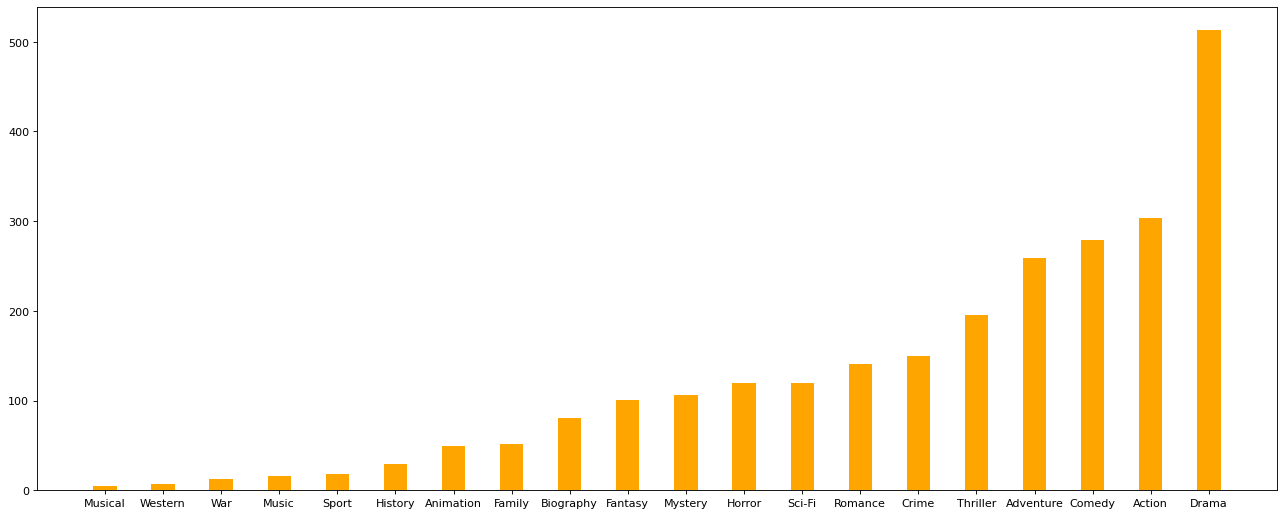

In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
#导演要拍什么题材电影
file_path = "./IMDB-Movie-Data.csv"

df = pd.read_csv(file_path)
print(df["Genre"].head(3))  #看前几条数据，掌握格式，内容类型
# 统计分类的列表
temp_list = df["Genre"].str.split(",").tolist()  # [[],[],[]]
# 二维变为1位
genre_list = list(set([i for j in temp_list for i in j]))
print(len(genre_list))
# 构造全为0的数组，行是原来的样本数，列是题材类型数目，one-hot编码，
zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(genre_list))), columns=genre_list)
print(zeros_df)

# 给每个电影出现分类的位置赋值1
for i in range(df.shape[0]):
    # zeros_df.loc[0,["Sci-fi","Mucical"]] = 1
    zeros_df.loc[i, temp_list[i]] = 1

print(zeros_df.head(3))

# 统计每个分类的电影的数量和，genre_count是什么类型？
genre_count = zeros_df.sum(axis=0)
print(genre_count)

# 排序
genre_count = genre_count.sort_values()
_x = genre_count.index
_y = genre_count.values
# 画图
plt.figure(figsize=(20, 8), dpi=80)
plt.bar(range(len(_x)), _y, width=0.4, color="orange")
plt.xticks(range(len(_x)), _x)
plt.show()

# 9 Pandas分组与聚合

In [17]:
import pandas as pd
import numpy as np
dict_obj = {'key1' : ['a', 'b', 'a', 'b', 
                      'a', 'b', 'a', 'a'],
            'key2' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
            'data1': np.random.randn(8),
            'data2': np.random.randn(8)}
df_obj = pd.DataFrame(dict_obj)

print(df_obj)

# dataframe根据key1进行分组，分组后的对象类型
print(df_obj.groupby('key1'))
print(type(df_obj.groupby('key1')))
print('-'*50)
print(df_obj['data1'])
# dataframe的 data1 列根据 key1 进行分组
print(type(df_obj['data1'].groupby(df_obj['key1'])))

# 分组运算
grouped1 = df_obj.groupby('key1')
print(grouped1.mean())

grouped2 = df_obj['data1'].groupby(df_obj['key1'])
print(grouped2.mean())


  key1   key2     data1     data2
0    a    one -0.987806 -2.054820
1    b    one -0.137758  0.846153
2    a    two  0.493839 -0.300169
3    b  three  0.074974  0.556787
4    a    two  1.563429  2.412365
5    b    two -1.013934  1.488090
6    a    one  0.408670 -2.110680
7    a  three  1.199262  0.679045
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
--------------------------------------------------
0   -0.987806
1   -0.137758
2    0.493839
3    0.074974
4    1.563429
5   -1.013934
6    0.408670
7    1.199262
Name: data1, dtype: float64
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


TypeError: Could not convert onetwotwoonethree to numeric

### 3. 按自定义的key分组

In [52]:
# # 按自定义key分组，列表
self_def_key = [0, 1, 2, 3, 3, 3, 5, 7]
print(df_obj.groupby(self_def_key).size())  #等于mysql的count,输出各个组的个数
print(df_obj.groupby(self_def_key).sum()) 
# 按自定义key分组，多层列表
print(df_obj.groupby([df_obj['key1'], df_obj['key2']]).size())

# # 按多个列多层分组
print('-'*50)
grouped2 = df_obj.groupby(['key1', 'key2'])
print(grouped2.size())

# # 多层分组按key的顺序进行
print('-'*50)
grouped3 = df_obj.groupby(['key2', 'key1'])
print(grouped3.size())
print(grouped3.mean())
# unstack可以将多层索引的结果转换成单层的dataframe
print(grouped3.mean().index)
print(grouped3.mean().unstack())  #竖变横
print(grouped3.mean().unstack().columns)
# # 多层分组，根据key1 和 key2，做个性化处理
for group_name, group_data in grouped3:
    print(group_name)
    print(group_data)
    print(type(group_data))

0    1
1    1
2    1
3    3
5    1
7    1
dtype: int64
      data1     data2
0  0.005960  0.427404
1  0.298347  1.105852
2  0.066390 -0.081896
3  4.884292  0.525321
5 -0.018378 -0.304255
7 -0.288909  1.483033
key1  key2 
a     one      2
      three    1
      two      2
b     one      1
      three    1
      two      1
dtype: int64
--------------------------------------------------
key1  key2 
a     one      2
      three    1
      two      2
b     one      1
      three    1
      two      1
dtype: int64
--------------------------------------------------
key2   key1
one    a       2
       b       1
three  a       1
       b       1
two    a       2
       b       1
dtype: int64
               data1     data2
key2  key1                    
one   a    -0.006209  0.061575
      b     0.298347  1.105852
three a    -0.288909  1.483033
      b     0.949566 -0.909807
two   a     1.026466  0.265288
      b     1.948185  0.822655
MultiIndex([(  'one', 'a'),
            (  'one', 'b'),
    

In [79]:
list(grouped3)

[(('one', 'a'),
    key1 key2     data1     data2
  0    a  one -0.452115 -0.386893
  6    a  one -1.099682 -0.767768),
 (('one', 'b'),
    key1 key2     data1     data2
  1    b  one -1.037842  1.087503),
 (('three', 'a'),
    key1   key2     data1     data2
  7    a  three  0.540446  0.294871),
 (('three', 'b'),
    key1   key2     data1    data2
  3    b  three  0.740737  0.13788),
 (('two', 'a'),
    key1 key2     data1     data2
  2    a  two  0.750604  1.506356
  4    a  two -0.667486 -0.930043),
 (('two', 'b'),
    key1 key2     data1     data2
  5    b  two -0.024905  0.829065)]

# 按类型分组

In [18]:
print(df_obj.dtypes)

key1      object
key2      object
data1    float64
data2    float64
dtype: object


In [53]:
#一列数据类型必须一致，因为现实生活中一个特征类型是一致的
df_obj['data3']=df_obj['data2']+1
print(df_obj)
print(df_obj.groupby(df_obj.dtypes, axis=1).size())#按轴0没有意义
print(df_obj.groupby(df_obj.dtypes, axis=1).sum()) 
self_column_key=[1,2,3,3,4]
print(df_obj.groupby(self_column_key, axis=1).sum())   #通过自定义索引去让不同列相加

  key1   key2     data1     data2     data3
0    a    one  0.005960  0.427404  1.427404
1    b    one  0.298347  1.105852  2.105852
2    a    two  0.066390 -0.081896  0.918104
3    b  three  0.949566 -0.909807  0.090193
4    a    two  1.986542  0.612473  1.612473
5    b    two  1.948185  0.822655  1.822655
6    a    one -0.018378 -0.304255  0.695745
7    a  three -0.288909  1.483033  2.483033
float64    3
object     2
dtype: int64
    float64  object
0  1.860767    aone
1  3.510050    bone
2  0.902598    atwo
3  0.129952  bthree
4  4.211488    atwo
5  4.593495    btwo
6  0.373113    aone
7  3.677157  athree
   1      2         3         4
0  a    one  0.433364  1.427404
1  b    one  1.404198  2.105852
2  a    two -0.015506  0.918104
3  b  three  0.039759  0.090193
4  a    two  2.599015  1.612473
5  b    two  2.770840  1.822655
6  a    one -0.322632  0.695745
7  a  three  1.194124  2.483033


### 2. 通过字典分组

In [54]:
df_obj2 = pd.DataFrame(np.random.randint(1, 10, (5,5)),
                       columns=['a', 'b', 'c', 'd', 'e'],
                       index=['A', 'B', 'C', 'D', 'E'])
# 给指定某个部分的数据重新赋值为 np.NaN
df_obj2.loc['B','b':'d']=np.NAN

print(df_obj2)
# 通过字典分组
mapping_dict = {'a':'Python', 'b':'Python', 'c':'Java', 'd':'C', 'e':'Java'}
print(df_obj2.groupby(mapping_dict, axis=1).size())
print(df_obj2.groupby(mapping_dict, axis=1).count()) # 非NaN的个数
print(df_obj2.groupby(mapping_dict, axis=1).sum())  #求和不记录nan,nan当为0


   a    b    c    d  e
A  9  6.0  3.0  8.0  9
B  7  NaN  NaN  NaN  1
C  8  4.0  3.0  2.0  9
D  4  3.0  4.0  2.0  2
E  7  3.0  6.0  2.0  7
C         1
Java      2
Python    2
dtype: int64
   C  Java  Python
A  1     2       2
B  0     1       1
C  1     2       2
D  1     2       2
E  1     2       2
     C  Java  Python
A  8.0  12.0    15.0
B  0.0   1.0     7.0
C  2.0  12.0    12.0
D  2.0   6.0     7.0
E  2.0  13.0    10.0


In [11]:
str1='熊大'

In [12]:
str1[0]

'熊'

In [18]:
# 通过函数分组
df_obj3 = pd.DataFrame(np.random.randint(1, 10, (5,5)),
                       columns=['a', 'b', 'c', 'd', 'ee'],
                       index=['AA', 'BBBB', 'CC', 'D', 'EE'])
#df_obj3

def group_key(idx):
    """
        idx 为列索引或行索引，默认为行索引
    """
    #return idx
    return len(idx)
print(df_obj3)
print(df_obj3.groupby(group_key).size())

# 以上自定义函数等价于
df_obj3.groupby(len).size()


      a  b  c  d  ee
AA    2  8  4  2   1
BBBB  9  9  2  6   8
CC    1  9  3  6   1
D     6  1  9  6   4
EE    8  3  4  8   1
1    1
2    3
4    1
dtype: int64


1    1
2    3
4    1
dtype: int64

In [58]:
# 通过索引级别分组
columns = pd.MultiIndex.from_arrays([['Python', 'Java', 'Python', 'Java', 'Python'],
                                     ['A', 'A', 'B', 'C', 'B']], 
                                    names=['language', 'index1'])
df_obj4 = pd.DataFrame(np.random.randint(1, 10, (5, 5)), columns=columns)
print(df_obj4)

# 根据language进行分组
print(df_obj4.groupby(level='language', axis=1).sum())
# 根据index进行分组
print(df_obj4.groupby(level='index1', axis=1).sum())


                 0  1  2  3  4
language index1               
Python   A       1  6  4  1  2
Java     A       6  8  3  2  7
Python   B       7  6  7  5  7
Java     C       5  6  4  8  8
Python   B       2  5  6  2  6
           0   1   2   3   4
language                    
Java      11  14   7  10  15
Python    10  17  17   8  15
        0   1   2  3   4
index1                  
A       7  14   7  3   9
B       9  11  13  7  13
C       5   6   4  8   8


## 聚合


In [59]:
dict_obj = {'key1' : ['a', 'b', 'a', 'b', 
                      'a', 'b', 'a', 'a'],
            'key2' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
            'data1': np.random.randint(1,10, 8),
            'data2': np.random.randint(1,10, 8)}
print(df_obj.groupby("key1").sum())
print(df_obj.groupby("key1").max())
print(df_obj.groupby("key1").min())
print('-'*50)
#平均值
print(df_obj.groupby("key1").mean())
print('-'*50)
print(df_obj.groupby("key1").describe())

         data1     data2     data3
key1                              
a     1.751605  2.136759  7.136759
b     3.196097  1.018700  4.018700
     key2     data1     data2     data3
key1                                   
a     two  1.986542  1.483033  2.483033
b     two  1.948185  1.105852  2.105852
     key2     data1     data2     data3
key1                                   
a     one -0.288909 -0.304255  0.695745
b     one  0.298347 -0.909807  0.090193
--------------------------------------------------
         data1     data2     data3
key1                              
a     0.350321  0.427352  1.427352
b     1.065366  0.339567  1.339567
--------------------------------------------------
     data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      5.0  0.350321  0.924794 -0.288909 -0.018378  0.005960  0.066390   
b 

In [61]:

df_obj5 = pd.DataFrame(dict_obj)
print(df_obj5)
# 自定义聚合函数
def peak_range(df):
    """
        返回数值范围,df参数是groupby后的groupby对象
    """
    #print type(df) #参数为索引所对应的记录
    return df.max() - df.min()

print(df_obj5.loc[:,['key1','data1','data2']].groupby('key1').agg(peak_range))
print(df_obj5.groupby('key1').agg(lambda df : df.max() - df.min()))

  key1   key2  data1  data2
0    a    one      1      5
1    b    one      1      4
2    a    two      6      3
3    b  three      7      7
4    a    two      1      3
5    b    two      5      1
6    a    one      1      3
7    a  three      5      9
      data1  data2
key1              
a         5      6
b         6      6
      data1  data2
key1              
a         5      6
b         6      6


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6964\2410739495.py:12: FutureWarning: ['key2'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(df_obj5.groupby('key1').agg(lambda df : df.max() - df.min()))


In [62]:
# 同时应用多个聚合函数
print(df_obj.groupby('key1').agg(['mean', 'std', 'count', peak_range]))

         data1                                data2                  \
          mean       std count peak_range      mean       std count   
key1                                                                  
a     0.350321  0.924794     5   2.275451  0.427352  0.697014     5   
b     1.065366  0.830993     3   1.649838  0.339567  1.091215     3   

                    data3                             
     peak_range      mean       std count peak_range  
key1                                                  
a      1.787288  1.427352  0.697014     5   1.787288  
b      2.015659  1.339567  1.091215     3   2.015659  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6964\3406391583.py:2: FutureWarning: ['key2'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(df_obj.groupby('key1').agg(['mean', 'std', 'count', peak_range]))


In [63]:
# 每列作用不同的聚合函数
dict_mapping = {'data1':'mean',
                'data2':'count'}
print(df_obj.groupby('key1').agg(dict_mapping))


         data1  data2
key1                 
a     0.350321      5
b     1.065366      3


# 星巴克全球开店

In [8]:
import pandas as pd
import numpy as np

file_path = "./starbucks_store_worldwide.csv"

df = pd.read_csv(file_path)
print(df.head(1))
print(df.info())  #数据总体有一个把控
grouped=df.groupby(by='Country')
print("-"*20)
print(grouped.size())
print("-"*20)
print(grouped)

       Brand  Store Number     Store Name Ownership Type     Street Address  \
0  Starbucks  47370-257954  Meritxell, 96       Licensed  Av. Meritxell, 96   

               City State/Province Country Postcode Phone Number  \
0  Andorra la Vella              7      AD    AD500    376818720   

                  Timezone  Longitude  Latitude  
0  GMT+1:00 Europe/Andorra       1.53     42.51  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 


In [2]:
#任取一列求count，也可以用country列自身
country_count = grouped["Brand"].count()
print(country_count)
print(country_count["US"])
print(country_count["CN"])

Country
AD        1
AE      144
AR      108
AT       18
AU       22
      ...  
TT        3
TW      394
US    13608
VN       25
ZA        3
Name: Brand, Length: 73, dtype: int64
13608
2734


0        False
1        False
2        False
3        False
4        False
         ...  
25595    False
25596    False
25597    False
25598    False
25599    False
Name: Country, Length: 25600, dtype: bool
**********


<BarContainer object of 31 artists>

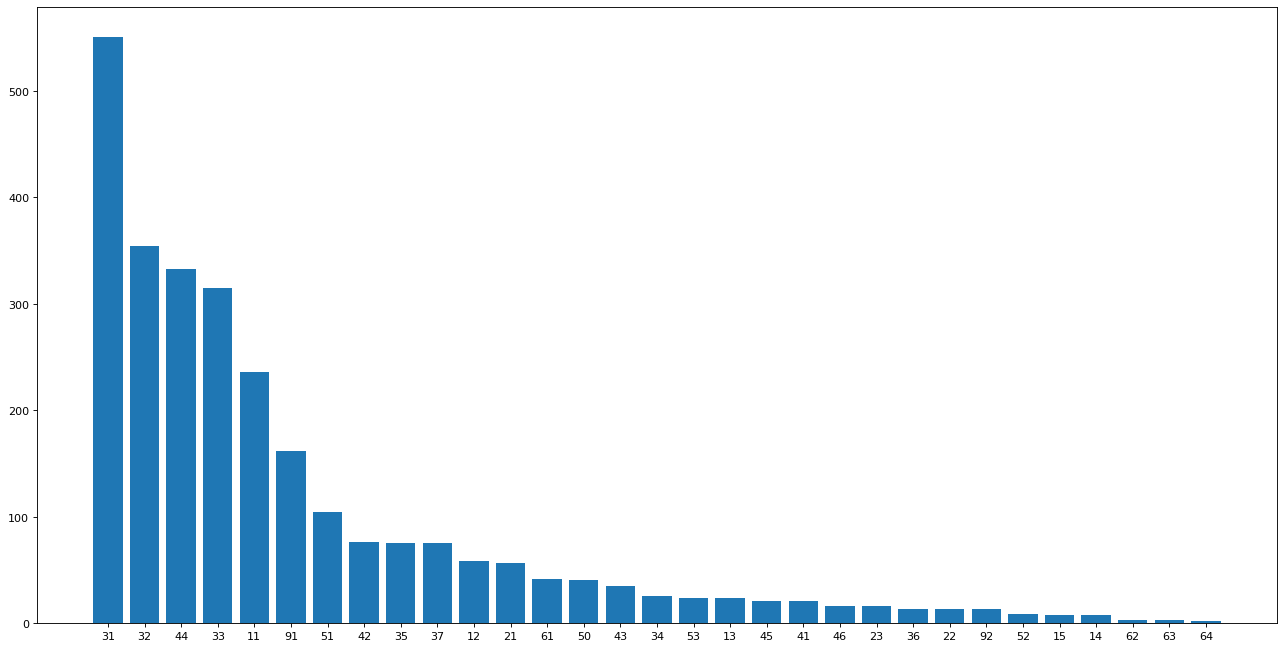

In [14]:
#中国不同省份的星巴克数量，图像绘制
import matplotlib.pyplot as plt
country_cn=df[df['Country']=='CN']
print(df['Country']=='CN')
# print(country_cn)
print("*"*10)
china_province=country_cn.groupby(by="State/Province").count()['Brand'].sort_values(ascending=False)
plt.figure(figsize=(20,10),dpi=80)
plt.bar(china_province.index,china_province.values)

In [67]:
china_province.index

Index(['31', '32', '44', '33', '11', '91', '51', '42', '35', '37', '12', '21',
       '61', '50', '43', '34', '53', '13', '45', '41', '46', '23', '36', '22',
       '92', '52', '15', '14', '62', '63', '64'],
      dtype='object', name='State/Province')

In [31]:
grouped1 = df[["Brand"]].groupby(by=[df["Country"], df["State/Province"]]).count()
grouped1

Brand
Country State/Province       
AD      7                   1
AE      AJ                  2
        AZ                 48
        DU                 82
        FU                  2
...                       ...
US      WV                 25
        WY                 23
VN      HN                  6
        SG                 19
ZA      GT                  3

[545 rows x 1 columns]

In [34]:
grouped2 = df.groupby(by=[df["Country"], df["State/Province"]]).count()
grouped2

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
...                       ...           ...         ...             ...   
US      WV                 25            25          25              25   
        WY                 23            23          23              23   
VN      HN                  6             6           6               6   
        SG                 19            19          19              19   
ZA      GT                  3             3           3               3   

                        Street Address  City  Postcode  Phone Number  \
Country State/Province                                                 
AD      7                            1     1         1             1   
AE      AJ                           2     2         0             0   
        AZ                          48    48         7            20   
        DU                          82    82        16            50   
        FU                           2     2         1             0   
...                                ...   ...       ...           ...   
US      WV                          25    25        25            23   
        WY                          23    23        23            22   
VN      HN                           6     6         6             6   
        SG                          19    19        19            17   
ZA      GT                           3     3         3             2   

                        Timezone  Longitude  Latitude  
Country State/Province                                 
AD      7                      1          1         1  
AE      AJ                     2          2         2  
        AZ                    48         48        48  
        DU                    82         82        82  
        FU                     2          2         2  
...                          ...        ...       ...  
US      WV                    25         25        25  
        WY                    23         23        23  
VN      HN                     6          6         6  
        SG                    19         19        19  
ZA      GT                     3          3         3  

[545 rows x 11 columns]

In [68]:
country_cn[country_cn['State/Province']=='32']

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
3062,Starbucks,48862-265746,Changshu Fangta Street-GF,Joint Venture,Fangta Street and HeDong Street,Changshu,32,CN,215500,NaN,GMT+08:00 Asia/Beijing,120.75,31.64
3063,Starbucks,48238-258108,CZ Wujin Kaia Lomo Plaza Store-GF,Joint Venture,"Huayuan St & Yongsheng Road, Wujin District",Changzhou,32,CN,213000,NaN,GMT+08:00 Asia/Beijing,119.95,31.69
3064,Starbucks,26608-244608,Nanjing Sun Palace Store-GF,Joint Venture,"No.3 yangguang Rd, Xuanwu",Nanjing,32,CN,210000,NaN,GMT+08:00 Asia/Beijing,118.81,32.06
3065,Starbucks,48586-263487,NT Haimen Zhongnan Plaza Store-GF,Joint Venture,"Zhangjian Avenue&Nanhai Road, Haimen City",Nantong,32,CN,226000,NaN,GMT+08:00 Asia/Beijing,121.17,31.88
3066,Starbucks,49404-268987,NT Rudong wenfeng Dept Store-GF,Joint Venture,"No.19 North Qingyuan Rd, Rudong",Nantong,32,CN,226000,NaN,GMT+08:00 Asia/Beijing,121.18,32.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,Starbucks,24743-238567,镇江丹阳吾悦广场店,Joint Venture,"丹阳市开发区, 新民东路99号10#-102铺位",镇江市,32,CN,NaN,NaN,GMT+08:00 Asia/Beijing,119.61,32.00
3412,Starbucks,24065-234944,丹阳金鹰天地店,Joint Venture,"丹阳市, 金鹰天地广场",镇江市,32,CN,212300,NaN,GMT+08:00 Asia/Beijing,119.58,31.99
3413,Starbucks,24740-238713,泰州靖江泰和国际城店,Joint Venture,车站路77号泰和国际城C1-01铺位,靖江市,32,CN,214500,NaN,GMT+08:00 Asia/Beijing,120.26,32.01
3414,Starbucks,24336-236945,泰州靖江文峰大世界店,Joint Venture,"人民北路1号文峰大世界1层1-2单元, 通湖路333号",靖江市,32,CN,214500,NaN,GMT+08:00 Asia/Beijing,120.27,32.02


# 设置索引

In [72]:
#索引中单项不可变，但是整体可以换掉
a = pd.DataFrame({'a': range(7),'b': range(7, 0, -1),
                  'c': ['one','one','one','two','two','two', 'two'],
                  'd': list("hjklmno")})
a

,a,b,c,d
0,0,7,one,h
1,1,6,one,j
2,2,5,one,k
3,3,4,two,l
4,4,3,two,m
5,5,2,two,n
6,6,1,two,o


In [73]:
c=a.copy()
a.index=list('abcdefg')  #a的索引变了，a.index更换索引
print(c)
print(a)
print('-'*50)
# reindex并不改变c本身的索引
b=c.reindex(list('abcdefg'))  #返回一个新的df，索引是设置了c的索引后，c索引不变,b是没有值
# b获得与c相同的形状
print(c)
b

   a  b    c  d
0  0  7  one  h
1  1  6  one  j
2  2  5  one  k
3  3  4  two  l
4  4  3  two  m
5  5  2  two  n
6  6  1  two  o
   a  b    c  d
a  0  7  one  h
b  1  6  one  j
c  2  5  one  k
d  3  4  two  l
e  4  3  two  m
f  5  2  two  n
g  6  1  two  o
--------------------------------------------------
   a  b    c  d
0  0  7  one  h
1  1  6  one  j
2  2  5  one  k
3  3  4  two  l
4  4  3  two  m
5  5  2  two  n
6  6  1  two  o


,a,b,c,d
a,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,NaN
c,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN
f,NaN,NaN,NaN,NaN
g,NaN,NaN,NaN,NaN


In [74]:
#让某些列变为索引，让c列，d列数据变为索引，成了层级索引
print(a)
print(a.set_index(['c','d']))#a没变，返回修改后的df
a

   a  b    c  d
a  0  7  one  h
b  1  6  one  j
c  2  5  one  k
d  3  4  two  l
e  4  3  two  m
f  5  2  two  n
g  6  1  two  o
       a  b
c   d      
one h  0  7
    j  1  6
    k  2  5
two l  3  4
    m  4  3
    n  5  2
    o  6  1


,a,b,c,d
a,0,7,one,h
b,1,6,one,j
c,2,5,one,k
d,3,4,two,l
e,4,3,two,m
f,5,2,two,n
g,6,1,two,o


### 时间序列

In [75]:
pd.date_range(start="20190101", end="20190924")

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-09-15', '2019-09-16', '2019-09-17', '2019-09-18',
               '2019-09-19', '2019-09-20', '2019-09-21', '2019-09-22',
               '2019-09-23', '2019-09-24'],
              dtype='datetime64[ns]', length=267, freq='D')

In [76]:
# 只取工作日
pd.date_range(start="20210712",periods=10,freq='B')

DatetimeIndex(['2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15',
               '2021-07-16', '2021-07-19', '2021-07-20', '2021-07-21',
               '2021-07-22', '2021-07-23'],
              dtype='datetime64[ns]', freq='B')

In [66]:
# 只取每个月的最后一天
pd.date_range(start="20190101",periods=10,freq='M')

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31'],
              dtype='datetime64[ns]', freq='M')

In [67]:
# 只取每个月的第一天
pd.date_range(start="20190101",periods=10,freq='MS')

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [17]:
# 只取每周的周日
pd.date_range(start="20210421",periods=10,freq='W')  #拿每周的周日生成

DatetimeIndex(['2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16',
               '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13',
               '2021-06-20', '2021-06-27'],
              dtype='datetime64[ns]', freq='W-SUN')

In [78]:
s = pd.Series(['3/11/2000', '3/12/2000', '3/13/2000'] * 1000)
s

0       3/11/2000
1       3/12/2000
2       3/13/2000
3       3/11/2000
4       3/12/2000
          ...    
2995    3/12/2000
2996    3/13/2000
2997    3/11/2000
2998    3/12/2000
2999    3/13/2000
Length: 3000, dtype: object

In [79]:
#timeit可以统计执行耗时，to_datetime把字符串转为时间格式
# 可以统计整个单元格的耗时
%timeit pd.to_datetime(s, infer_datetime_format=True)  

The slowest run took 4.91 times longer than the fastest. This could mean that an intermediate result is being cached.
2.87 ms ± 2.07 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


                           lat        lng  \
timeStamp                                   
2015-12-10 17:10:52  40.297876 -75.581294   
2015-12-10 17:29:21  40.258061 -75.264680   
2015-12-10 14:39:21  40.121182 -75.351975   
2015-12-10 16:47:36  40.116153 -75.343513   
2015-12-10 16:56:52  40.251492 -75.603350   
2015-12-10 15:39:04  40.253473 -75.283245   
2015-12-10 16:46:48  40.182111 -75.127795   
2015-12-10 16:17:05  40.217286 -75.405182   
2015-12-10 16:51:42  40.289027 -75.399590   
2015-12-10 17:35:41  40.102398 -75.291458   

                                                                  desc  \
timeStamp                                                                
2015-12-10 17:10:52  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
2015-12-10 17:29:21  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2015-12-10 14:39:21  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
2015-12-10 16:47:36  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
2015-12-10 16:5

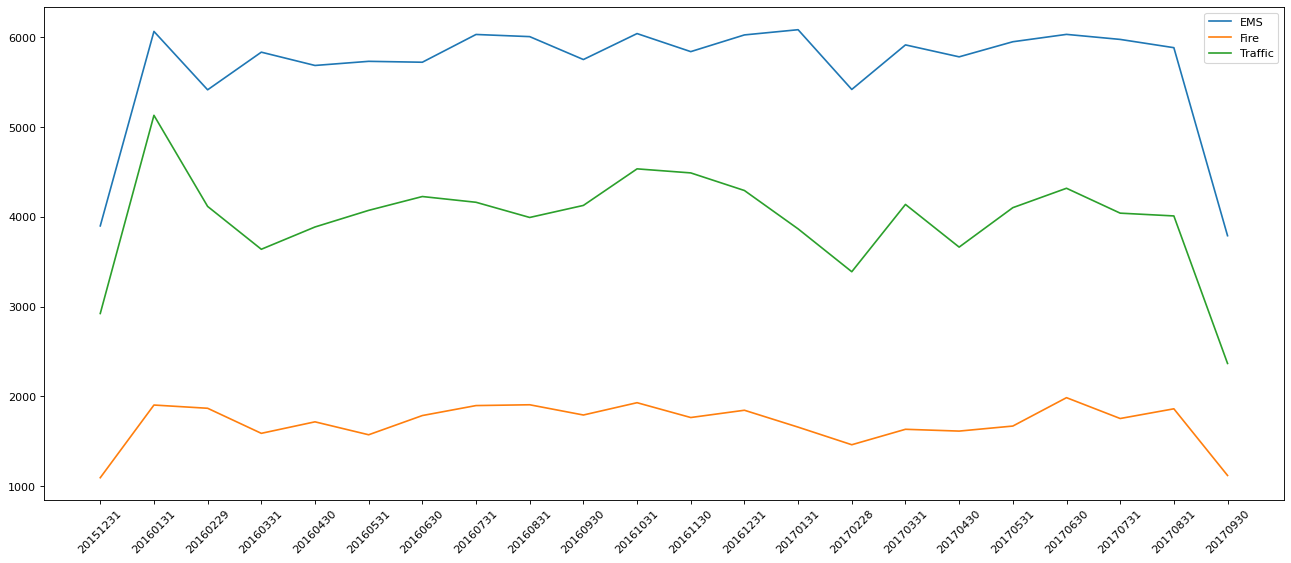

In [2]:
#实战美国911数据
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# 把时间字符串转为时间类型设置为索引
df = pd.read_csv("./911.csv")
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

# 添加列，表示分类
temp_list = df["title"].str.split(": ").tolist()
cate_list = [i[0] for i in temp_list] #i[0]就是EMS  Fire  Traffic
# print(cate_list)
# print(np.array(cate_list).reshape((df.shape[0], 1)))
df["cate"] = pd.DataFrame(np.array(cate_list).reshape((df.shape[0], 1)))  #添加一列

# 将时间戳变成了索引，inplace不再创建新的dataframe而是直接更改原来的dataframe
df.set_index("timeStamp", inplace=True)

print(df.head(10))

plt.figure(figsize=(20, 8), dpi=80)

# 分组,一图多线
for group_name, group_data in df.groupby(by="cate"):
    #对不同的分类都进行绘图
    count_by_month = group_data.resample("M").count()["cate"]  #降采样
    print(count_by_month)
    # 画图
    _x = count_by_month.index
    print(_x)
    _y = count_by_month.values

    _x = [i.strftime("%Y%m%d") for i in _x]  #变年月日格式

    plt.plot(_x, _y, label=group_name)

plt.xticks(range(len(_x)), _x, rotation=45)
plt.legend(loc="best")
plt.show()

In [4]:
file_path = "./PM2.5/BeijingPM20100101_20151231.csv"

df = pd.read_csv(file_path)
# print(df.head(10))

# 把分开的时间字符串通过periodIndex的方法转化为pandas的时间类型
period = pd.PeriodIndex(year=df["year"], month=df["month"], day=df["day"],
                        hour=df["hour"], freq="H")
df["datetime"] = period
print(df.head(10))


   No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
0   1  2010      1    1     0       4        NaN            NaN   
1   2  2010      1    1     1       4        NaN            NaN   
2   3  2010      1    1     2       4        NaN            NaN   
3   4  2010      1    1     3       4        NaN            NaN   
4   5  2010      1    1     4       4        NaN            NaN   
5   6  2010      1    1     5       4        NaN            NaN   
6   7  2010      1    1     6       4        NaN            NaN   
7   8  2010      1    1     7       4        NaN            NaN   
8   9  2010      1    1     8       4        NaN            NaN   
9  10  2010      1    1     9       4        NaN            NaN   

   PM_Nongzhanguan  PM_US Post  DEWP  HUMI    PRES  TEMP cbwd    Iws  \
0              NaN         NaN -21.0  43.0  1021.0 -11.0   NW   1.79   
1              NaN         NaN -21.0  47.0  1020.0 -12.0   NW   4.92   
2              NaN         NaN -21.0  43.0  10

In [5]:
# 把datetime 设置为索引
df.set_index("datetime", inplace=True)

# 进行降采样，进行降采样，行索引必须是pd的时间类型
df = df.resample("7D").mean()
print(df.head())


TypeError: Could not convert NWNWNWNWNWNWNWNWNWNWNWNWNWNWNWcvNWNWNENWcvNWNWcvSESESESESESESESESESESESESESESESESESESESESESESESESESESESESESESESESESESESESESESESESESEcvcvNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNENENENENENENENENEcvNWNWNWNWNWNWNWNWNWNWNENENENENENENENENENENENENWNWcvNWNWNWcvNWNWNWNWNWcvcvNWNWNWNWNENWNWNWNWNWNWNWNWNWNWNENWNEcvcvcv to numeric

In [6]:
df.iloc[312]

No                    313
year                 2010
month                   1
day                    14
hour                    0
season                  4
PM_Dongsi             NaN
PM_Dongsihuan         NaN
PM_Nongzhanguan       NaN
PM_US Post          257.0
DEWP                -18.0
HUMI                 71.0
PRES               1026.0
TEMP                -14.0
cbwd                   NE
Iws                  1.78
precipitation         0.0
Iprec                 0.0
Name: 2010-01-14 00:00, dtype: object

datetime
2013-01-17 06:00     20.0
2013-01-17 07:00     20.0
2013-01-17 08:00     27.0
2013-01-17 09:00     28.0
2013-01-17 10:00     15.0
                    ...  
2013-01-21 07:00    156.0
2013-01-21 08:00    148.0
2013-01-21 09:00    125.0
2013-01-21 10:00    123.0
2013-01-21 11:00      3.0
Freq: H, Name: PM_Nongzhanguan, Length: 100, dtype: float64
24661 24661


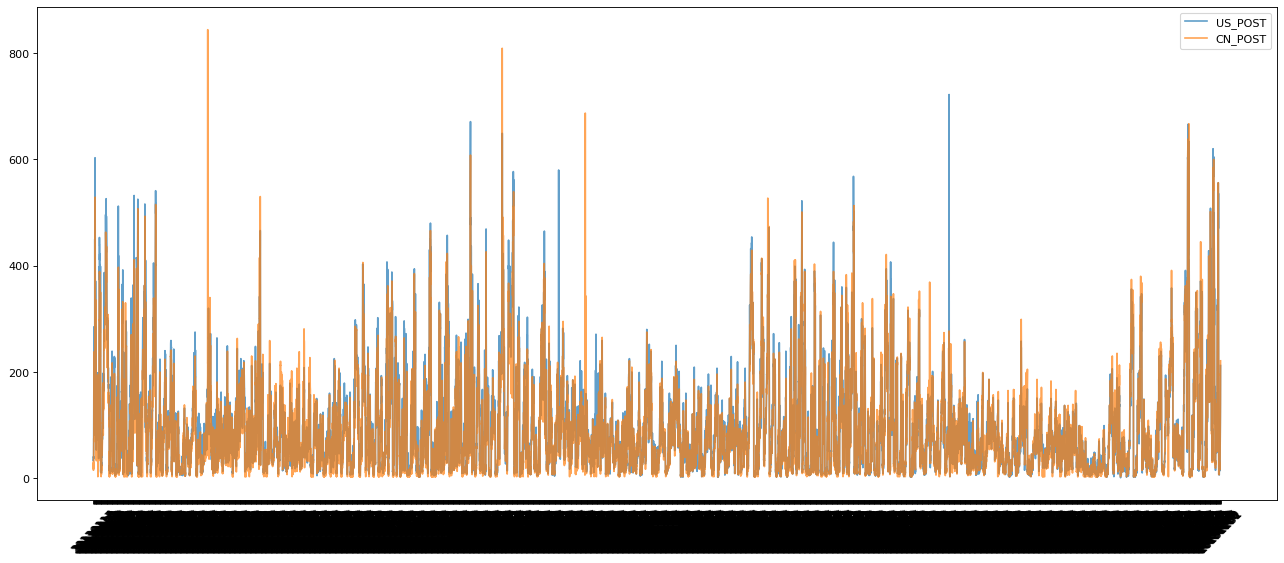

In [7]:
#对比农展馆和美国测试的数据
df= df.loc[:,["PM_US Post","PM_Nongzhanguan"]]
df=df.dropna()  #任何一个为空，整个样本去掉
data=df.loc[:,"PM_US Post"]
data_china = df.loc[:,"PM_Nongzhanguan"]



print(data_china.head(100))
# 画图
_x = data.index
_x = [i.strftime("%Y%m%d") for i in _x]
_x_china = [i.strftime("%Y%m%d") for i in data_china.index]
print(len(_x), len(_x_china))
_y = data.values  #美国的
_y_china = data_china.values

plt.figure(figsize=(20, 8), dpi=80)

plt.plot(range(len(_x)), _y, label="US_POST", alpha=0.7)
plt.plot(range(len(_x_china)), _y_china, label="CN_POST", alpha=0.7)

plt.xticks(range(0, len(_x_china), 10),list(_x_china)[::10], rotation=45)

plt.legend(loc="best")

plt.show()

### 分组运算

In [85]:
dict_obj = {'key1' : ['a', 'b', 'a', 'b', 
                      'a', 'b', 'a', 'a'],
            'key2' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
            'data1': np.random.randint(1, 10, 8),
            'data2': np.random.randint(1, 10, 8)}
df_obj = pd.DataFrame(dict_obj)
print(df_obj)

# 按key1分组后，计算data1，data2的统计信息并附加到原始表格中，并添加表头前缀
k1_sum = df_obj.groupby('key1').sum().add_prefix('sum_')
print(k1_sum)

  key1   key2  data1  data2
0    a    one      2      6
1    b    one      6      3
2    a    two      4      7
3    b  three      3      1
4    a    two      6      5
5    b    two      6      9
6    a    one      2      7
7    a  three      5      8
      sum_data1  sum_data2
key1                      
a            19         33
b            15         13


In [86]:
df_obj

,key1,key2,data1,data2
0,a,one,2,6
1,b,one,6,3
2,a,two,4,7
3,b,three,3,1
4,a,two,6,5
5,b,two,6,9
6,a,one,2,7
7,a,three,5,8


In [87]:
k1_sum

,sum_data1,sum_data2
key1,,
a,19,33
b,15,13


In [88]:
# 两个df之间进行连接
#和mysql的join是一致的，on 连接条件
k1_sum_merge = pd.merge(df_obj, k1_sum, left_on='key1', right_index=True)
k1_sum_merge

,key1,key2,data1,data2,sum_data1,sum_data2
0,a,one,2,6,19,33
2,a,two,4,7,19,33
4,a,two,6,5,19,33
6,a,one,2,7,19,33
7,a,three,5,8,19,33
1,b,one,6,3,15,13
3,b,three,3,1,15,13
5,b,two,6,9,15,13


In [89]:
# 方法2，使用transform,使得分组后的形状和原来相同，将聚合后的值填入到各个位置
k1_sum_tf = df_obj.groupby('key1').transform(np.sum).add_prefix('sum_')
k1_sum_tf
# df_obj[k1_sum_tf.columns] = k1_sum_tf
# print(df_obj)

,sum_key2,sum_data1,sum_data2
0,onetwotwoonethree,19,33
1,onethreetwo,15,13
2,onetwotwoonethree,19,33
3,onethreetwo,15,13
4,onetwotwoonethree,19,33
5,onethreetwo,15,13
6,onetwotwoonethree,19,33
7,onetwotwoonethree,19,33


In [95]:
df_obj.groupby('key1').mean()

,data1,data2
key1,,
a,5.600000,7.000000
b,6.666667,4.333333


In [98]:
df_obj

,key1,key2,data1,data2
0,a,one,9,6
1,b,one,6,4
2,a,two,3,7
3,b,three,9,2
4,a,two,4,9
5,b,two,5,7
6,a,one,3,5
7,a,three,9,8


In [99]:
df_obj.groupby('key1').transform(np.mean)

,data1,data2
0,5.600000,7.000000
1,6.666667,4.333333
2,5.600000,7.000000
3,6.666667,4.333333
4,5.600000,7.000000
5,6.666667,4.333333
6,5.600000,7.000000
7,5.600000,7.000000


In [100]:
def diff_mean(s):
    """
        返回数据与均值的差值
    """
    return s - s.mean()

print(df_obj.groupby('key1').transform(diff_mean))

      data1     data2
0  3.400000 -1.000000
1 -0.666667 -0.333333
2 -2.600000  0.000000
3  2.333333 -2.333333
4 -1.600000  2.000000
5 -1.666667  2.666667
6 -2.600000 -2.000000
7  3.400000  1.000000


# 星际争霸

In [90]:
dataset_path = './starcraft.csv'
df_data = pd.read_csv(dataset_path, usecols=['LeagueIndex', 'Age', 'HoursPerWeek', 
                                             'TotalHours', 'APM'])
df_data

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM
0,5,27.0,10.0,3000.0,143.7180
1,5,23.0,10.0,5000.0,129.2322
2,4,30.0,10.0,200.0,69.9612
3,3,19.0,20.0,400.0,107.6016
4,3,32.0,10.0,500.0,122.8908
...,...,...,...,...,...
3390,8,NaN,NaN,NaN,259.6296
3391,8,NaN,NaN,NaN,314.6700
3392,8,NaN,NaN,NaN,299.4282
3393,8,NaN,NaN,NaN,375.8664


In [91]:
def top_n(df, n=3, column='APM'):
    """
        返回每个分组按 column 的 top n 数据
    """
    return df.sort_values(by=column, ascending=False)[:n]

print(df_data.groupby('LeagueIndex').apply(top_n))

                  LeagueIndex   Age  HoursPerWeek  TotalHours       APM
LeagueIndex                                                            
1           2214            1  20.0          12.0       730.0  172.9530
            2246            1  27.0           8.0       250.0  141.6282
            1753            1  20.0          28.0       100.0  139.6362
2           3062            2  20.0           6.0       100.0  179.6250
            3229            2  16.0          24.0       110.0  156.7380
            1520            2  29.0           6.0       250.0  151.6470
3           1557            3  22.0           6.0       200.0  226.6554
            484             3  19.0          42.0       450.0  220.0692
            2883            3  16.0           8.0       800.0  208.9500
4           2688            4  26.0          24.0       990.0  249.0210
            1759            4  16.0           6.0        75.0  229.9122
            2637            4  23.0          24.0       650.0  2

In [104]:
# apply函数接收的参数会传入自定义的函数中
df_data.groupby('LeagueIndex').apply(top_n, n=2, column='Age')

LeagueIndex   Age  HoursPerWeek  TotalHours       APM
LeagueIndex                                                            
1           3146            1  40.0          12.0       150.0   38.5590
            3040            1  39.0          10.0       500.0   29.8764
2           920             2  43.0          10.0       730.0   86.0586
            2437            2  41.0           4.0       200.0   54.2166
3           1258            3  41.0          14.0       800.0   77.6472
            2972            3  40.0          10.0       500.0   60.5970
4           1696            4  44.0           6.0       500.0   89.5266
            1729            4  39.0           8.0       500.0   86.7246
5           202             5  37.0          14.0       800.0  327.7218
            2745            5  37.0          18.0      1000.0  123.4098
6           3069            6  31.0           8.0       800.0  133.1790
            2706            6  31.0           8.0       700.0   66.9918
7           2813            7  26.0          36.0      1300.0  188.5512
            1992            7  26.0          24.0      1000.0  219.6690
8           3340            8   NaN           NaN         NaN  189.7404
            3341            8   NaN           NaN         NaN  287.8128

In [105]:
print(df_data.groupby('LeagueIndex', group_keys=False).apply(top_n))

      LeagueIndex   Age  HoursPerWeek  TotalHours       APM
2214            1  20.0          12.0       730.0  172.9530
2246            1  27.0           8.0       250.0  141.6282
1753            1  20.0          28.0       100.0  139.6362
2196            1  24.0          18.0       200.0  106.7454
547             1  19.0           8.0       300.0  104.4486
1080            1  16.0          20.0        20.0  103.0962
3062            2  20.0           6.0       100.0  179.6250
3229            2  16.0          24.0       110.0  156.7380
1520            2  29.0           6.0       250.0  151.6470
3014            2  18.0          28.0       300.0  145.4184
2598            2  16.0          24.0      1024.0  142.7670
1679            2  26.0          30.0       150.0  134.1606
1557            3  22.0           6.0       200.0  226.6554
484             3  19.0          42.0       450.0  220.0692
2883            3  16.0           8.0       800.0  208.9500
3107            3  18.0          14.0   

# 10 数据清洗

In [122]:
import pandas as pd
import numpy as np

df_obj1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                        'data1' : np.random.randint(0,10,7)})
df_obj2 = pd.DataFrame({'key': ['a', 'b' ,'d'],
                        'data2' : np.random.randint(0,10,3)})

print(df_obj1)
print('-'*50)
print(df_obj2)

  key  data1
0   b      5
1   b      2
2   a      6
3   c      8
4   a      2
5   a      2
6   b      6
--------------------------------------------------
  key  data2
0   a      7
1   b      0
2   d      3


In [109]:
pd.merge(df_obj1, df_obj2)

,key,data1,data2
0,b,3,9
1,b,2,9
2,b,9,9
3,a,6,1
4,a,0,1
5,a,2,1


In [111]:
pd.merge(df_obj1, df_obj2,left_index=True,right_index=True)

,key_x,data1,key_y,data2
0,b,3,a,1
1,b,2,b,9
2,a,6,d,7


In [118]:
pd.merge(df_obj1, df_obj2, on='key')

,key,data1,data2
0,b,3,1
1,b,0,1
2,b,3,1
3,a,1,7
4,a,1,8
5,a,3,7
6,a,3,8
7,a,5,7
8,a,5,8


In [123]:
# 更改列名
df_obj1 = df_obj1.rename(columns={'key':'key1'})
df_obj2 = df_obj2.rename(columns={'key':'key2'})

In [113]:
df_obj1

,key1,data1
0,b,3
1,b,2
2,a,6
3,c,4
4,a,0
5,a,2
6,b,9


In [114]:
df_obj2

,key2,data2
0,a,1
1,b,9
2,d,7


In [120]:
pd.merge(df_obj1, df_obj2, left_on='key1', right_on='key2')

,key1,data1,key2,data2
0,b,3,b,1
1,b,0,b,1
2,b,3,b,1
3,a,1,a,7
4,a,1,a,8
5,a,3,a,7
6,a,3,a,8
7,a,5,a,7
8,a,5,a,8


In [124]:
#left join 等价于 left outer join
pd.merge(df_obj1, df_obj2, left_on='key1', right_on='key2', how='outer')  #全外连接

,key1,data1,key2,data2
0,b,5.0,b,0.0
1,b,2.0,b,0.0
2,b,6.0,b,0.0
3,a,6.0,a,7.0
4,a,2.0,a,7.0
5,a,2.0,a,7.0
6,c,8.0,NaN,NaN
7,NaN,NaN,d,3.0


In [125]:
pd.merge(df_obj1, df_obj2, left_on='key1', right_on='key2', how='left')

,key1,data1,key2,data2
0,b,5,b,0.0
1,b,2,b,0.0
2,a,6,a,7.0
3,c,8,NaN,NaN
4,a,2,a,7.0
5,a,2,a,7.0
6,b,6,b,0.0


In [126]:
pd.merge(df_obj1, df_obj2, left_on='key1', right_on='key2', how='right')

,key1,data1,key2,data2
0,a,6.0,a,7
1,a,2.0,a,7
2,a,2.0,a,7
3,b,5.0,b,0
4,b,2.0,b,0
5,b,6.0,b,0
6,NaN,NaN,d,3


In [128]:
# 处理重复列名
df_obj1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                        'data' : np.random.randint(0,10,7)})
df_obj2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                        'data' : np.random.randint(0,10,3)})

print(pd.merge(df_obj1, df_obj2, on='key', suffixes=('_left', '_right')))

  key  data_left  data_right
0   b          4           3
1   b          5           3
2   b          5           3
3   a          9           8
4   a          2           8
5   a          3           8


In [129]:
# 按索引连接
df_obj1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                        'data1' : np.random.randint(0,10,7)})
df_obj2 = pd.DataFrame({'data2' : np.random.randint(0,10,3)}, index=['a', 'b', 'd'])

print(pd.merge(df_obj1, df_obj2, left_on='key', right_index=True))

  key  data1  data2
0   b      7      6
1   b      2      6
6   b      6      6
2   a      4      8
4   a      3      8
5   a      7      8


In [130]:
pd.merge(df_obj2,df_obj1, left_index=True, right_on='key')

,data2,key,data1
2,8,a,4
4,8,a,3
5,8,a,7
0,6,b,7
1,6,b,2
6,6,b,6


# 11 数据合并(pd.concat)

In [131]:
arr1 = np.random.randint(0, 10, (3, 4))
arr2 = np.random.randint(0, 10, (3, 4))

print(arr1)
print(arr2)

print(np.concatenate([arr1, arr2]))
print(np.concatenate([arr1, arr2], axis=1))

[[1 4 1 4]
 [0 5 3 7]
 [3 7 1 0]]
[[9 8 3 4]
 [2 3 0 5]
 [3 7 6 8]]
[[1 4 1 4]
 [0 5 3 7]
 [3 7 1 0]
 [9 8 3 4]
 [2 3 0 5]
 [3 7 6 8]]
[[1 4 1 4 9 8 3 4]
 [0 5 3 7 2 3 0 5]
 [3 7 1 0 3 7 6 8]]


In [132]:
# index 没有重复的情况
ser_obj1 = pd.Series(np.random.randint(0, 10, 5), index=range(0,5))
ser_obj2 = pd.Series(np.random.randint(0, 10, 4), index=range(5,9))
ser_obj3 = pd.Series(np.random.randint(0, 10, 3), index=range(9,12))

print(ser_obj1)
print(ser_obj2)
print(ser_obj3)

0    0
1    8
2    1
3    2
4    0
dtype: int32
5    1
6    4
7    2
8    5
dtype: int32
9     3
10    0
11    4
dtype: int32


In [133]:
print(pd.concat([ser_obj1, ser_obj2, ser_obj3]))
print(pd.concat([ser_obj1, ser_obj2, ser_obj3], axis=1))

0     0
1     8
2     1
3     2
4     0
5     1
6     4
7     2
8     5
9     3
10    0
11    4
dtype: int32
      0    1    2
0   0.0  NaN  NaN
1   8.0  NaN  NaN
2   1.0  NaN  NaN
3   2.0  NaN  NaN
4   0.0  NaN  NaN
5   NaN  1.0  NaN
6   NaN  4.0  NaN
7   NaN  2.0  NaN
8   NaN  5.0  NaN
9   NaN  NaN  3.0
10  NaN  NaN  0.0
11  NaN  NaN  4.0


### index 有重复的情况

In [134]:
# index 有重复的情况
ser_obj1 = pd.Series(np.random.randint(0, 10, 5), index=range(5))
ser_obj2 = pd.Series(np.random.randint(0, 10, 4), index=range(4))
ser_obj3 = pd.Series(np.random.randint(0, 10, 3), index=range(3))

print(ser_obj1)
print(ser_obj2)
print(ser_obj3)

0    2
1    2
2    9
3    6
4    0
dtype: int32
0    9
1    3
2    7
3    5
dtype: int32
0    1
1    5
2    5
dtype: int32


In [135]:
print(pd.concat([ser_obj1, ser_obj2, ser_obj3]))

0    2
1    2
2    9
3    6
4    0
0    9
1    3
2    7
3    5
0    1
1    5
2    5
dtype: int32


In [78]:
print(pd.concat([ser_obj1, ser_obj2, ser_obj3], axis=1, join='outer'))

   0    1    2
0  0  6.0  9.0
1  9  4.0  8.0
2  7  1.0  6.0
3  3  6.0  NaN
4  0  NaN  NaN


In [136]:
import pandas as pd
import numpy as np
df_obj1 = pd.DataFrame(np.random.randint(0, 10, (3, 2)), index=['a', 'b', 'c'],
                       columns=['A', 'B'])
df_obj2 = pd.DataFrame(np.random.randint(0, 10, (2, 2)), index=['a', 'b'],
                       columns=['A', 'B'])
print(df_obj1)
print(df_obj2)

print(pd.concat([df_obj1, df_obj2]))
print(pd.concat([df_obj1, df_obj2], axis=1))

   A  B
a  4  3
b  0  7
c  8  7
   A  B
a  6  7
b  2  9
   A  B
a  4  3
b  0  7
c  8  7
a  6  7
b  2  9
   A  B    A    B
a  4  3  6.0  7.0
b  0  7  2.0  9.0
c  8  7  NaN  NaN


### 数据重构

In [141]:
df_obj = pd.DataFrame(np.random.randint(0,10, (5,2)), columns=['data1', 'data2'])
print(df_obj)

stacked = df_obj.stack()  #stack内部带的参数level，选择哪一个column变为index
print(stacked)

   data1  data2
0      7      0
1      7      0
2      8      2
3      8      0
4      8      0
0  data1    7
   data2    0
1  data1    7
   data2    0
2  data1    8
   data2    2
3  data1    8
   data2    0
4  data1    8
   data2    0
dtype: int32


In [83]:
# 默认操作内层索引
print(stacked.unstack())

# 通过level指定操作索引的级别
print(stacked.unstack(level=0))

   data1  data2
0      4      9
1      0      0
2      3      0
3      6      9
4      2      9
       0  1  2  3  4
data1  4  0  3  6  2
data2  9  0  0  9  9


In [149]:
index1 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd'],
                [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]], names=['cloth', 'size'])

df= pd.DataFrame(np.arange(24).reshape(12,2),index=index1,columns=['data1','data2'])
print(df)
df_s=df.unstack(level=0)
print(df_s)
print(df_s.columns)
df_s.stack(0)

            data1  data2
cloth size              
a     0         0      1
      1         2      3
      2         4      5
b     0         6      7
      1         8      9
      2        10     11
c     0        12     13
      1        14     15
      2        16     17
d     0        18     19
      1        20     21
      2        22     23
      data1             data2            
cloth     a   b   c   d     a   b   c   d
size                                     
0         0   6  12  18     1   7  13  19
1         2   8  14  20     3   9  15  21
2         4  10  16  22     5  11  17  23
MultiIndex([('data1', 'a'),
            ('data1', 'b'),
            ('data1', 'c'),
            ('data1', 'd'),
            ('data2', 'a'),
            ('data2', 'b'),
            ('data2', 'c'),
            ('data2', 'd')],
           names=[None, 'cloth'])


cloth       a   b   c   d
size                     
0    data1  0   6  12  18
     data2  1   7  13  19
1    data1  2   8  14  20
     data2  3   9  15  21
2    data1  4  10  16  22
     data2  5  11  17  23

 ## 处理重复数据

In [152]:
df_obj = pd.DataFrame({'data1' : ['a'] * 4 + ['b'] * 4,
                       'data2' : np.random.randint(0, 4, 8)})
print(df_obj)

  data1  data2
0     a      3
1     a      1
2     a      2
3     a      1
4     b      3
5     b      1
6     b      2
7     b      0


In [154]:
print(df_obj.duplicated())
df_obj[~df_obj.duplicated()]  #取出不重复行

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
dtype: bool


,data1,data2
0,a,3
1,a,1
2,a,2
4,b,3
5,b,1
6,b,2
7,b,0


In [155]:
print(df_obj.duplicated('data2'))

0    False
1    False
2    False
3     True
4     True
5     True
6     True
7    False
dtype: bool


In [156]:
df_obj1 = pd.DataFrame({'data1' :[np.nan] * 4,
                       'data2' :list('1235')})
df_obj1

,data1,data2
0,NaN,1
1,NaN,2
2,NaN,3
3,NaN,5


In [157]:
df_obj1.duplicated('data1')

0    False
1     True
2     True
3     True
dtype: bool

In [158]:
print(df_obj.drop_duplicates())  #删除重复行
print(df_obj.drop_duplicates('data2'))

  data1  data2
0     a      3
1     a      1
2     a      2
4     b      3
5     b      1
6     b      2
7     b      0
  data1  data2
0     a      3
1     a      1
2     a      2
7     b      0


In [99]:
df_obj

,data1,data2
0,a,1
1,a,2
2,a,2
3,a,3
4,b,2
5,b,2
6,b,0
7,b,0


In [159]:
ser_obj = pd.Series(np.random.randint(0,10,10))  #series 用map
print(ser_obj)

print(ser_obj.map(lambda x : x ** 2))

0    8
1    9
2    9
3    1
4    0
5    4
6    6
7    4
8    5
9    1
dtype: int32
0    64
1    81
2    81
3     1
4     0
5    16
6    36
7    16
8    25
9     1
dtype: int64


In [164]:
ser_obj=pd.Series(np.arange(10))
# 单个值替换单个值
print(ser_obj.replace(1, -100))

# 多个值替换一个值
print(ser_obj.replace(range(6,9), -100))

# 多个值替换多个值
print(ser_obj.replace([4, 7], [-100, -200]))

0      0
1   -100
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
dtype: int32
0      0
1      1
2      2
3      3
4      4
5      5
6   -100
7   -100
8   -100
9      9
dtype: int32
0      0
1      1
2      2
3      3
4   -100
5      5
6      6
7   -200
8      8
9      9
dtype: int64


In [165]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})

In [166]:
df

,A,B,C
0,0,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [167]:
df.replace(to_replace=r'^a', value=100, regex=True)

,A,B,C
0,0,5,100
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [168]:
df.dtypes

A     int64
B     int64
C    object
dtype: object